[View in Colaboratory](https://colab.research.google.com/github/papasanimohansrinivas/Programming_Language_Detection/blob/added_further_set/Programming_Language_Detection.ipynb)

In [3]:
!git clone https://github.com/papasanimohansrinivas/Programming_Language_Detection.git master

Cloning into 'master'...
remote: Counting objects: 24, done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 24 (delta 6), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [0]:
import pandas

In [9]:
ls

index.html  Programming_Data.csv  walkthedir.py


In [8]:
cd master

/content/master


#### If you dont use header = None option initially loading into dataframe is going to be a headache 

In [0]:
t=pandas.read_csv("Programming_Data.csv",header=None)

In [0]:
t = t.sample(frac=1).reset_index(drop=True)

In [0]:
from collections import Counter

In [19]:
Counter(t['language'])

Counter({'bsh': 26,
         'coffee': 63,
         'cpp': 568,
         'java': 1325,
         'js': 871,
         'npy': 9,
         'py': 4394,
         'sh': 206})

In [0]:
t.columns = ['code','language']

### Drop the nan rows from code columns 

#### reason i got nan into the csv is even mysterious to me ?


In [0]:
import numpy as np

In [0]:
t=t[t.code!=np.nan]

In [0]:
def tokenize_the_code(column):
  
  import re

  pattern = r"""[\w']+|[""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""\\]"""
  
  try:
    
    return re.findall(pattern,column)
  
  except TypeError:
    
    return ""

  

In [0]:
t['code']=t['code'].apply(tokenize_the_code)

In [0]:
t=t[t['code']!=""]

### know the length of the programs by ploting the length of the programs

In [0]:
program_lengths = pandas.DataFrame(map(len,t['code']))

In [26]:
program_lengths.mean()

0    2323.329859
dtype: float64

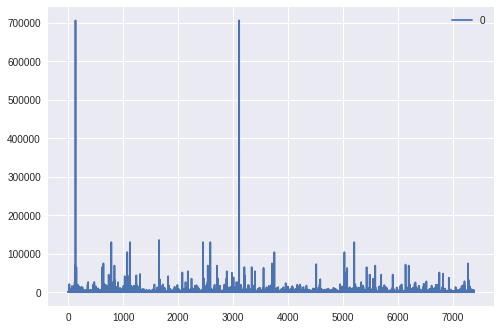

In [27]:
program_lengths.plot()

In [0]:
new_t=t[t['code'].map(len)<=500]

In [36]:
new_t.columns

Index([u'code', u'language'], dtype='object')

In [0]:
df=pandas.DataFrame(map(np.array,new_t['code']))

In [0]:
from collections import Counter

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,/,*,*,Licensed,to,the,Apache,Software,Foundation,(,...,None,None,None,None,None,None,None,None,None,None
1,#,Scan,an,Apple,header,file,",",generating,a,Python,...,None,None,None,None,None,None,None,None,None,None
2,"""","""","""",Fix,incompatible,imports,and,module,references,that,...,None,None,None,None,None,None,None,None,None,None
3,"""","""","""",Tests,for,distutils,.,command,.,bdist_msi,...,None,None,None,None,None,None,None,None,None,None
4,from,.,backend,import,FunctionBackend,class,THNNFunctionBackend,(,FunctionBackend,),...,None,None,None,None,None,None,None,None,None,None


In [0]:
modified_df = pandas.get_dummies(df, columns=df.columns)

In [40]:
modified_df.head()

,"0_""",0_#,0_$,0_'''Mock,0_'''Test,0_'''Unittests,0_'''idlelib,0_'Provides,0_'use,0_(,...,497_sep,497_test_main,497_},"498_""",498_(,498_),498_;,498_},499_),499_}
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(modified_df, new_t['language'], test_size=0.33, random_state=42)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt=DecisionTreeClassifier(criterion='entropy', splitter='best')

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
predictions = dt.predict(X_test)

In [0]:
def matchings(pred,test):
  
  count = 0
  
  for u,v in zip(pred,test):
    if u==v:
      count+=1
    else:
      print u,v
  
  print "matched predictions {asd} out of {total} accuracy is {acc}".format(asd=count,total=len(test),acc=((count+0.0)*100/(len(test))))
      

In [62]:
matchings(predictions,y_test)

py java
sh py
js py
java py
sh py
matched predictions 957 out of 962 accuracy is 99.4802494802
